In [100]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv("QWE_sales_data.csv")

df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)
df['rating_count'] = df['rating_count'].str.replace(",","").astype(float)

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['discount_percentage'] = df['discount_percentage'].fillna(0)
df['rating']= df['rating'].fillna(0)
X = df[['discount_percentage','rating']]
y = df['rating_count'].fillna(0)

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2 ,random_state=43)

df['discount_percentage']
# df['rating']
# df['rating_count']

0       64.0
1       43.0
2       90.0
3       53.0
4       61.0
        ... 
1460    59.0
1461    25.0
1462    28.0
1463    26.0
1464    22.0
Name: discount_percentage, Length: 1465, dtype: float64

In [101]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

y_pred



array([22898.25811271, 19023.44845959, 23820.75738984, 17732.10581619,
       15655.89615044, 13603.2766296 , 24328.79645677, 17985.34362671,
       21444.91134668, 22206.18822413, 20222.77569215, 22136.98123527,
       18931.43304876,  9981.70478699, 20015.15472557, 15540.29059469,
       22598.62173531, 10788.59850837, 16255.16890525, 19300.27641502,
       13972.11999586, 17662.11710438, 16624.79399446, 22598.62173531,
       17386.0708719 , 19184.67085927, 20914.84558074, 17362.48072698,
       20845.63859188, 20776.43160302, 18931.43304876, 20129.97855837,
       23083.07065732, 16255.16890525, 14686.99830642, 20199.18554723,
       17062.84434958, 16947.23879383, 16601.20384954, 16786.01639414,
       15356.25977303, 18100.94918246, 23405.51545669, 18815.82749301,
       13095.23756267, 18931.43304876, 13602.49490665, 18677.41351529,
       20430.39665873, 19415.10024782, 15817.11855012, 18331.378571  ,
       17731.32409324, 18123.75760443, 19876.74074786, 25827.76006674,
      

In [125]:
model.coef_

array([   69.20698886, 14069.4819914 ])

In [126]:
model.intercept_

-42675.433058939496

In [127]:
y =model.predict([[30,4.5]])
y

C:\Users\10725918\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22713.44556811])

In [129]:
y =  69.20698886*30 + 14069.4819914*4.5 -42675.433058939496
y

22713.445568160503

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_absolute_error(y_test,y_pred)
print(mse)

19998.80467658035


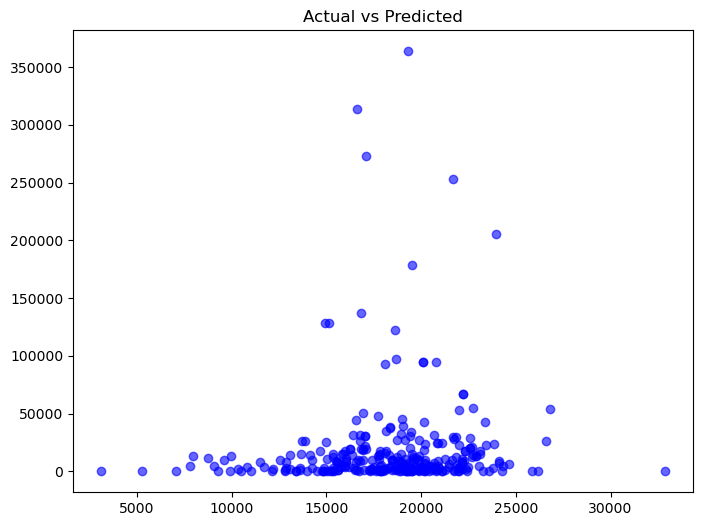

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_pred,y_test,color='blue', alpha=0.6)
plt.title("Actual vs Predicted")
plt.show()